In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, callbacks
import data_loader
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# SETTING
lr = 1e-5
epochs = 500
batch_size, validation_batch_size = 32, 32
validation_split = 0.2

In [3]:
def plot_history(history):
        plt.figure(figsize=(16, 6))

        epoch = len(history.history['accuracy'])
        print(epoch)

        # summarize history for accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['Training', 'Validation'], fontsize='large', loc='upper left')
        plt.xlim(0, epoch-1)
        plt.grid()

        # summarize history for loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['Training', 'Validation'], fontsize='large', loc='upper left')
        plt.xlim(0, epoch-1)
        plt.grid()

        plt.tight_layout()
        plt.show()

In [4]:
start = time.time()
dl = data_loader.data_loader()

dl.load_data("dataset/Town01")
dl.load_data("dataset/Town02")
dl.load_data("dataset/Town03")
dl.load_data("dataset/Town04")
dl.load_data("dataset/Town05")
dl.load_data("dataset/Town06")
dl.load_data("dataset/Town07")

train_images, test_images, train_labels, test_labels = dl.tf_dataset()
end = time.time()
print("END LOAD DATA: " + str(end - start))

2022-05-27 01:53:30.002502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-27 01:53:30.002893: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-27 01:53:30.042948: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-27 01:53:30.043310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-27 01:53:30.043634: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

Loading dataset/Town01
Loading dataset/Town02
Loading dataset/Town03
Loading dataset/Town04
Loading dataset/Town05
Loading dataset/Town06
Loading dataset/Town07
END LOAD DATA: 1164.0414385795593


In [11]:
CNN_model = models.Sequential([
            layers.Conv2D(16, (5,5), activation = "relu", padding = 'same', input_shape=(120, 160, 3)),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),

            layers.Conv2D(32, (5,5), activation = "relu", padding = 'same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            
            layers.Conv2D(48, (5,5), activation = "relu", padding = 'same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),

            layers.Conv2D(64, (3,3), activation = "relu", padding = 'same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),

            layers.Conv2D(64, (3,3), activation = "relu", padding = 'same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),

            layers.Conv2D(128, (3,3), activation = "relu", padding = 'same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),

            layers.GlobalAveragePooling2D(),

            layers.Flatten(),
            
            # layers.Dense(1164),
            # layers.BatchNormalization(),
            # layers.ReLU(),

            layers.Dense(100),
            layers.BatchNormalization(),
            layers.ReLU(),

            layers.Dense(50),
            layers.BatchNormalization(),
            layers.ReLU(),

            layers.Dense(10),
            layers.BatchNormalization(),
            layers.ReLU(),

            layers.Dense(3)
        ])

CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 120, 160, 16)      1216      
                                                                 
 batch_normalization_18 (Bat  (None, 120, 160, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 60, 80, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 80, 32)        12832     
                                                                 
 batch_normalization_19 (Bat  (None, 60, 80, 32)       128       
 chNormalization)                                                
                                                      

Epoch 1/500
151/151 [==============================] - 3s 13ms/step - loss: 1.2581 - accuracy: 0.1175 - val_loss: 0.5861 - val_accuracy: 0.0050
Epoch 2/500
151/151 [==============================] - 2s 12ms/step - loss: 1.0324 - accuracy: 0.1183 - val_loss: 1.1083 - val_accuracy: 0.0050
Epoch 3/500
151/151 [==============================] - 2s 12ms/step - loss: 0.9335 - accuracy: 0.1200 - val_loss: 1.1777 - val_accuracy: 0.0258
Epoch 4/500
151/151 [==============================] - 2s 12ms/step - loss: 0.8885 - accuracy: 0.1154 - val_loss: 0.8834 - val_accuracy: 0.0600
Epoch 5/500
151/151 [==============================] - 2s 12ms/step - loss: 0.8691 - accuracy: 0.1229 - val_loss: 0.8404 - val_accuracy: 0.0974
Epoch 6/500
151/151 [==============================] - 2s 12ms/step - loss: 0.8279 - accuracy: 0.1331 - val_loss: 0.8414 - val_accuracy: 0.1316
Epoch 7/500
151/151 [==============================] - 2s 12ms/step - loss: 0.7992 - accuracy: 0.1291 - val_loss: 0.8214 - val_accuracy:

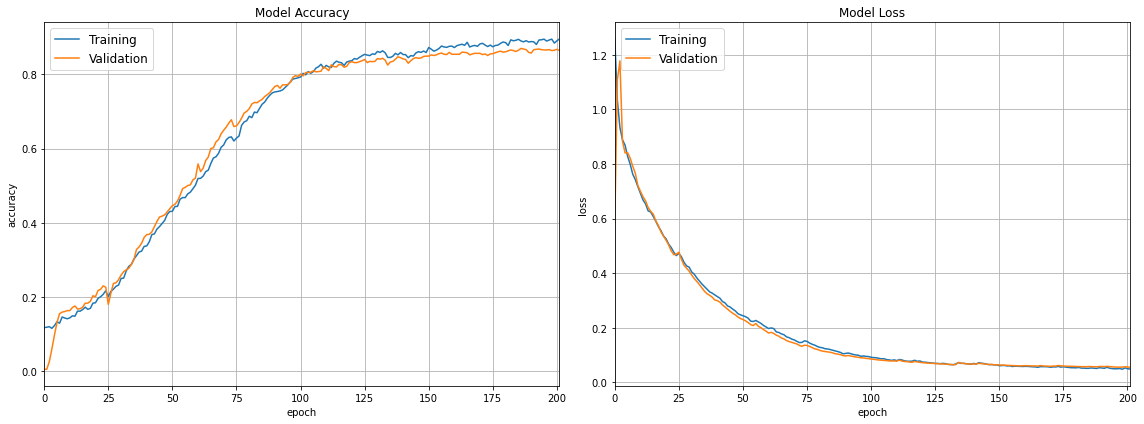

In [12]:
perm = tf.random.shuffle(tf.range(tf.shape(train_images)[0]))
train_images = tf.gather(train_images, perm, axis=0)
train_labels = tf.gather(train_labels, perm, axis=0)

es = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=15)

CNN_model.compile(optimizer=optimizers.Adam(learning_rate=lr), 
                  loss='mse', 
                  metrics=['accuracy'])

CNN_history = CNN_model.fit(train_images, train_labels, 
                                epochs=epochs, 
                                batch_size=batch_size, 
                                validation_split=validation_split, 
                                validation_batch_size=validation_batch_size,
                                verbose=1, 
                                callbacks=[es])

        # print(self.CNN_history.history.keys())
CNN_model.save('CNN_model')
plot_history(CNN_history)

In [83]:
perm = tf.random.shuffle(tf.range(tf.shape(test_images)[0]))
test_images = tf.gather(test_images, perm, axis=0)
test_labels = tf.gather(test_labels, perm, axis=0)

test_loss, test_acc = CNN_model.evaluate(test_images, test_labels, batch_size=8)
print(test_loss, test_acc)

161/161 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.8749
0.0504160039126873 0.8749029040336609


In [84]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
# summarize feature map shapes
for i in range(len(CNN_model.layers)):
	layer = CNN_model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_140 (None, 120, 160, 16)
3 conv2d_141 (None, 60, 80, 32)
6 conv2d_142 (None, 30, 40, 48)
9 conv2d_143 (None, 15, 20, 64)
12 conv2d_144 (None, 7, 10, 64)
15 conv2d_145 (None, 3, 5, 128)


(1, 60, 80, 32)


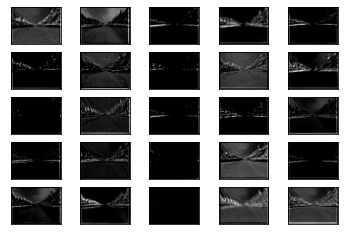

In [19]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from matplotlib import pyplot
from keras.models import Model
import cv2

model = Model(inputs=CNN_model.inputs, outputs=CNN_model.layers[3].output)
# model.summary()

img = cv2.imread('399_t04.jpg')
img = img/255.0
resized = cv2.resize(img, (160, 120), interpolation = cv2.INTER_AREA)   # 680/4, 480/4
resized = resized.astype(np.float16)
img = expand_dims(resized, axis=0)

# get feature map for first hidden layer
feature_maps = model.predict(img)
print(feature_maps.shape)
square = 5
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		# print(ix-1)
		ix += 1
# show the figure
pyplot.show()

